In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from null_elections import *
from voting_rules import *
from rcv_dimensionality import *
from rcv_distribution import *
from interval_consistency import *

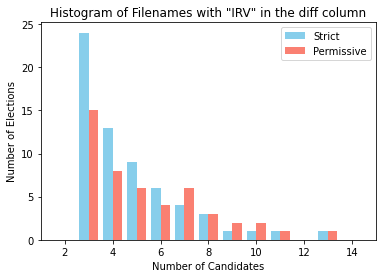

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from strict.csv
strict_df = pd.read_csv('strict.csv')

# Read data from permissive.csv
permissive_df = pd.read_csv('permissive.csv')

# Count the number of filenames with 'IRV' in the diff column based on the number of candidates for strict_df
strict_irv_counts = strict_df[strict_df['diff'].apply(lambda x: 'IRV' in x)]['#candidates'].value_counts()

# Count the number of filenames with 'IRV' in the diff column based on the number of candidates for permissive_df
permissive_irv_counts = permissive_df[permissive_df['diff'].apply(lambda x: 'IRV' in x)]['#candidates'].value_counts()

# Plotting the histogram
plt.bar(strict_irv_counts.index - 0.2, strict_irv_counts.values, color='skyblue', width=0.4, label='Strict')
plt.bar(permissive_irv_counts.index + 0.2, permissive_irv_counts.values, color='salmon', width=0.4, label='Permissive')
plt.xlabel('Number of Candidates')
plt.ylabel('Number of Elections')
plt.title('Histogram of Filenames with "IRV" in the diff column')
plt.legend()
plt.xlim(1, 15)
plt.show()


In [25]:
file = "dataverse_files/Corvallis_11082022_Mayor.csv"
ballots, candidates = parse_election_data(file)

e = voting_rules(ballots, candidates)
print(e.irv())

Charles Maughan


In [26]:
test = perform_rcv_analysis(file, n_runs=1000)
mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names = test

normalized_distances = get_distances_normalized(most_common_order, mds_1d_coordinates, candidate_names)
consistent_ballots = get_interval_consistent_ballots(ballots, normalized_distances)
print(consistent_ballots)

ballots:
[[ 0.  1.  2.]
 [ 0.  2.  1.]
 [ 0.  2.  1.]
 ...
 [nan nan nan]
 [nan  0.  2.]
 [nan nan nan]]


c:\Users\mahsh\Documents\GitHub\bugs-in-democracy\EIL summer 2023\rcv_dimensionality.py:174: RuntimeWarning: divide by zero encountered in true_divide
  distance = 1 / np.sqrt(freq_upper_triangle)


({('Andrew Struthers', 'Roen Hogg', 'Charles Maughan'): 2119, ('Andrew Struthers', 'Charles Maughan', 'Roen Hogg'): 3722, ('Andrew Struthers', 'Charles Maughan'): 511, ('Andrew Struthers', 'Roen Hogg'): 279, ('Andrew Struthers',): 521, ('Charles Maughan', 'Andrew Struthers', 'Roen Hogg'): 4405, ('Charles Maughan', 'Andrew Struthers'): 760, ('Charles Maughan', 'Roen Hogg'): 197, ('Charles Maughan',): 372, ('Roen Hogg',): 847, ('Roen Hogg', 'Andrew Struthers', 'Charles Maughan'): 2484, ('Roen Hogg', 'Andrew Struthers'): 228, ('Roen Hogg', 'Charles Maughan'): 168}, 0.8062606163552536)


In [27]:
e2 = voting_rules(consistent_ballots[0], candidates)
print(e2.irv())

Andrew Struthers


In [28]:
print(consistent_ballots[1])

0.8062606163552536


In [6]:


# Read data from strict.csv

#strict_df = pd.read_csv('strict.csv')

# Read data from permissive.csv
permissive_file_name = os.path.join("strict&permissive", "permissive.csv")
permissive_df = pd.read_csv(permissive_file_name)

# Get filenames with 'IRV' in diff column in permissive.csv and not in strict.csv
permissive_irv_files = permissive_df[permissive_df['diff'].str.contains('IRV')]['filename']

# Print the filenames
print("Filenames in permissive.csv with 'IRV' in diff and not in strict.csv:")
for filename in permissive_irv_files:
    print(filename)


Filenames in permissive.csv with 'IRV' in diff and not in strict.csv:
Burlington_03072006_Mayor.csv
Corvallis_11082022_Mayor.csv
Maine_06122018_DemocraticPrimaryforCD2.csv
Maine_07142020_DemocraticCandidateforMaineStateHouseDistrict41.csv
Maine_07142020_DemocraticCandidateforMaineStateHouseDistrict49.csv
Maine_07142020_DemocraticCandidateforMaineStateHouseDistrict90.csv
Maine_07142020_DemocraticCandidateforMaineStateSenateDistrict11.csv
Minneapolis_11022021_CityCouncilWard2.csv
Minneapolis_11022021_CityCouncilWard5.csv
Minneapolis_11022021_ParkBoardDistrict2.csv
Minneapolis_11072017_PRBoardDistrict6.csv
Minneapolis_11072017_Ward1CityCouncil.csv
NewYorkCity_06222021_DEMBoroughPresidentQueens.csv
NewYorkCity_06222021_DEMCouncilMember18thCouncilDistrict.csv
NewYorkCity_06222021_DEMCouncilMember25thCouncilDistrict.csv
NewYorkCity_06222021_DEMCouncilMember32ndCouncilDistrict.csv
NewYorkCity_06222021_DEMCouncilMember9thCouncilDistrict.csv
NewYorkCity_06222021_REPBoroughPresidentRichmond.csv


In [7]:
print(len(permissive_irv_files))

48


In [36]:



# Read data from permissive.csv
strict_file_name = os.path.join("strict&permissive", "strict.csv")
strict_df = pd.read_csv(strict_file_name)

# Get filenames with 'IRV' in diff column in permissive.csv and not in strict.csv
strict_irv_files = strict_df[strict_df['diff'].str.contains('IRV')]['filename']
print(len(strict_irv_files))



65


In [8]:
import pandas as pd
from tabulate import tabulate

# Step 1: Read the CSV file into a DataFrame
permissive_file_name = os.path.join("strict&permissive", "permissive.csv")

df = pd.read_csv(permissive_file_name)

# Step 2: Extract relevant information
df['diff'] = df['diff'].apply(eval)  # Convert string representation to list
df['IRV_present'] = df['diff'].apply(lambda x: 1 if 'IRV' in x else 0)

# Step 3: Group by 'level' and 'type' to get total counts and IRV counts
total_by_level = df.groupby(['#candidates', 'level']).size().reset_index(name='Total')
irv_by_level = df.groupby(['#candidates', 'level'])['IRV_present'].sum().reset_index(name='IRV_Count')
merged_level = pd.merge(total_by_level, irv_by_level, on=['#candidates', 'level'])
merged_level['Percentage'] = (merged_level['IRV_Count'] / merged_level['Total']) * 100

total_by_type = df.groupby(['#candidates', 'type']).size().reset_index(name='Total')
irv_by_type = df.groupby(['#candidates', 'type'])['IRV_present'].sum().reset_index(name='IRV_Count')
merged_type = pd.merge(total_by_type, irv_by_type, on=['#candidates', 'type'])
merged_type['Percentage'] = (merged_type['IRV_Count'] / merged_type['Total']) * 100

# Step 4: Format the tables
table_level = tabulate(merged_level, headers='keys', tablefmt='pretty')
table_type = tabulate(merged_type, headers='keys', tablefmt='pretty')

# Step 5: Save the tables to text files
with open('table_level_with_percentage.txt', 'w') as file:
    file.write(table_level)

with open('table_type_with_percentage.txt', 'w') as file:
    file.write(table_type)


In [10]:
import pandas as pd
from tabulate import tabulate

# Step 1: Read the CSV file into a DataFrame
permissive_file_name = os.path.join("strict&permissive", "permissive.csv")

df = pd.read_csv(permissive_file_name)

# Step 2: Extract relevant information
df['diff'] = df['diff'].apply(eval)  # Convert string representation to list
df['IRV_present'] = df['diff'].apply(lambda x: 1 if 'IRV' in x else 0)

# Step 3: Group by 'level' to get total counts and IRV counts
total_by_level = df.groupby('level').size().reset_index(name='Total')
irv_by_level = df.groupby('level')['IRV_present'].sum().reset_index(name='IRV_Count')
merged_level = pd.merge(total_by_level, irv_by_level, on='level')
merged_level['Percentage'] = (merged_level['IRV_Count'] / merged_level['Total']) * 100

# Step 4: Group by 'type' to get total counts and IRV counts
total_by_type = df.groupby('type').size().reset_index(name='Total')
irv_by_type = df.groupby('type')['IRV_present'].sum().reset_index(name='IRV_Count')
merged_type = pd.merge(total_by_type, irv_by_type, on='type')
merged_type['Percentage'] = (merged_type['IRV_Count'] / merged_type['Total']) * 100

# Step 5: Format the tables
table_level = tabulate(merged_level, headers='keys', tablefmt='pretty')
table_type = tabulate(merged_type, headers='keys', tablefmt='pretty')

# Step 6: Save the tables to text files
with open('table_level_without_candidates.txt', 'w') as file:
    file.write(table_level)

with open('table_type_without_candidates.txt', 'w') as file:
    file.write(table_type)


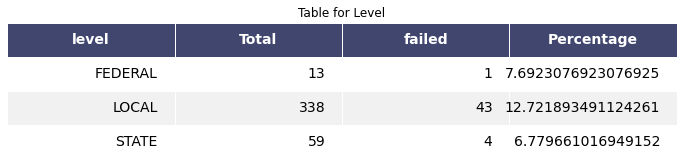

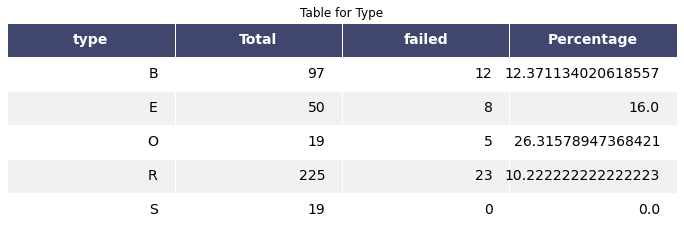

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read the CSV file into a DataFrame
permissive_file_name = os.path.join("strict&permissive", "permissive.csv")

df = pd.read_csv(permissive_file_name)

# Step 2: Extract relevant information
df['diff'] = df['diff'].apply(eval)  # Convert string representation to list
df['failed'] = df['diff'].apply(lambda x: 1 if 'IRV' in x else 0)

# Step 3: Group by 'level' to get total counts and IRV counts
total_by_level = df.groupby('level').size().reset_index(name='Total')
irv_by_level = df.groupby('level')['failed'].sum().reset_index(name='failed')
merged_level = pd.merge(total_by_level, irv_by_level, on='level')
merged_level['Percentage'] = (merged_level['failed'] / merged_level['Total']) * 100

# Step 4: Group by 'type' to get total counts and IRV counts
total_by_type = df.groupby('type').size().reset_index(name='Total')
irv_by_type = df.groupby('type')['failed'].sum().reset_index(name='failed')
merged_type = pd.merge(total_by_type, irv_by_type, on='type')
merged_type['Percentage'] = (merged_type['failed'] / merged_type['Total']) * 100

# Function to render a dataframe as an image
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors)])
    return ax

# Render and save the tables as images
ax = render_mpl_table(merged_level, header_columns=0, col_width=3.0)
plt.title('Table for Level')
plt.savefig('table_level.png', bbox_inches='tight', dpi=300)

ax = render_mpl_table(merged_type, header_columns=0, col_width=3.0)
plt.title('Table for Type')
plt.savefig('table_type.png', bbox_inches='tight', dpi=300)


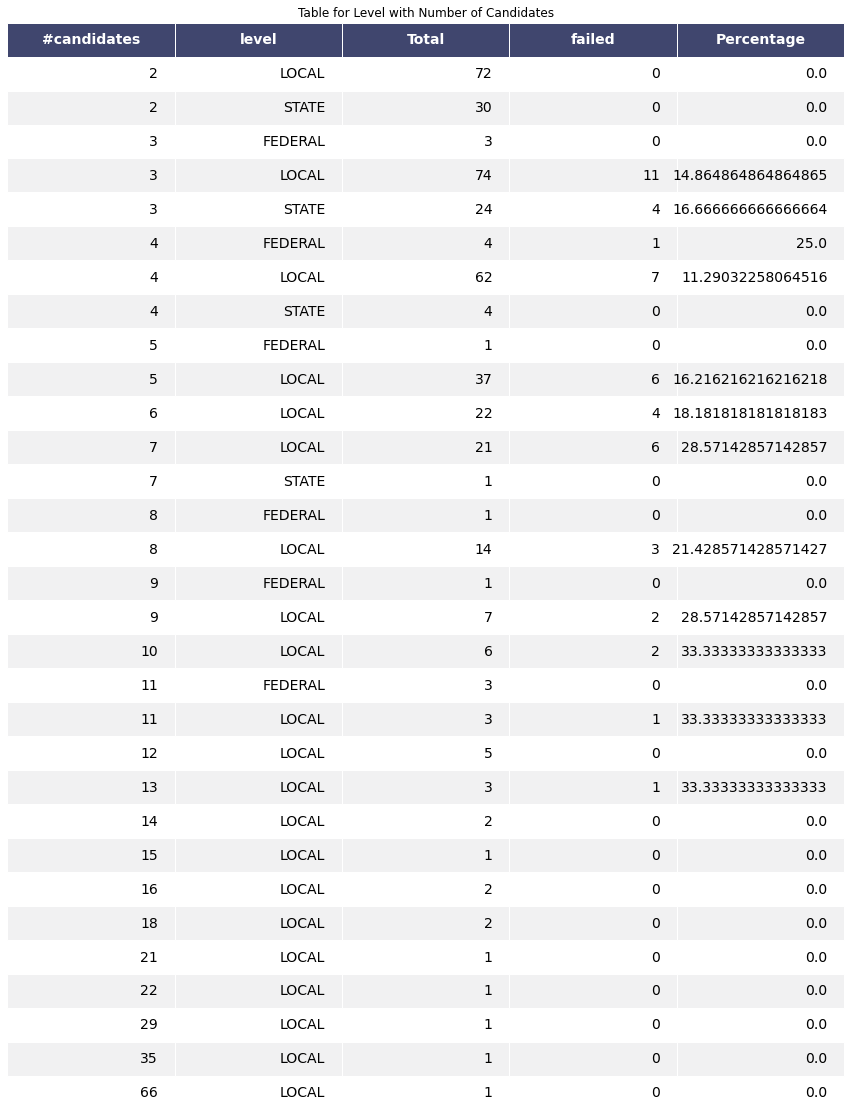

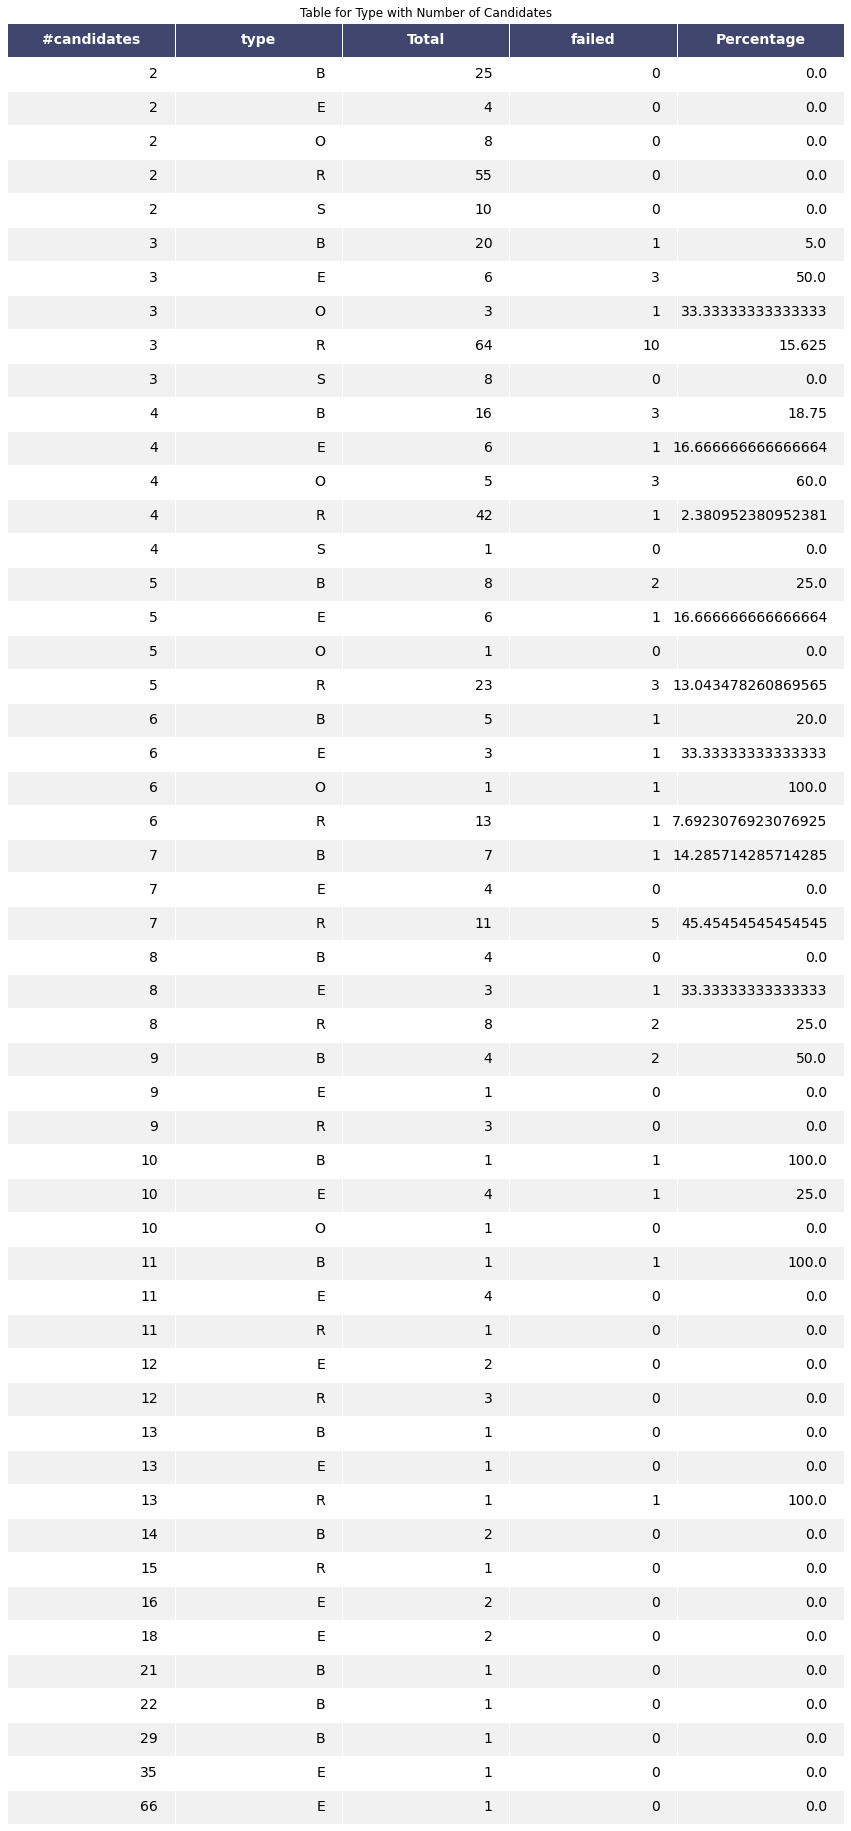

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read the CSV file into a DataFrame
permissive_file_name = os.path.join("strict&permissive", "permissive.csv")

df = pd.read_csv(permissive_file_name)

# Step 2: Extract relevant information
df['diff'] = df['diff'].apply(eval)  # Convert string representation to list
df['failed'] = df['diff'].apply(lambda x: 1 if 'IRV' in x else 0)

# Step 3: Group by '#candidates' and 'level' to get total counts and IRV counts
total_by_level = df.groupby(['#candidates', 'level']).size().reset_index(name='Total')
irv_by_level = df.groupby(['#candidates', 'level'])['failed'].sum().reset_index(name='failed')
merged_level = pd.merge(total_by_level, irv_by_level, on=['#candidates', 'level'])
merged_level['Percentage'] = (merged_level['failed'] / merged_level['Total']) * 100

# Step 4: Group by '#candidates' and 'type' to get total counts and IRV counts
total_by_type = df.groupby(['#candidates', 'type']).size().reset_index(name='Total')
irv_by_type = df.groupby(['#candidates', 'type'])['failed'].sum().reset_index(name='failed')
merged_type = pd.merge(total_by_type, irv_by_type, on=['#candidates', 'type'])
merged_type['Percentage'] = (merged_type['failed'] / merged_type['Total']) * 100

# Function to render a dataframe as an image
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors)])
    return ax

# Render and save the tables as images
ax = render_mpl_table(merged_level, header_columns=0, col_width=3.0)
plt.title('Table for Level with Number of Candidates')
plt.savefig('table_level_with_candidates.png', bbox_inches='tight', dpi=300)

ax = render_mpl_table(merged_type, header_columns=0, col_width=3.0)
plt.title('Table for Type with Number of Candidates')
plt.savefig('table_type_with_candidates.png', bbox_inches='tight', dpi=300)


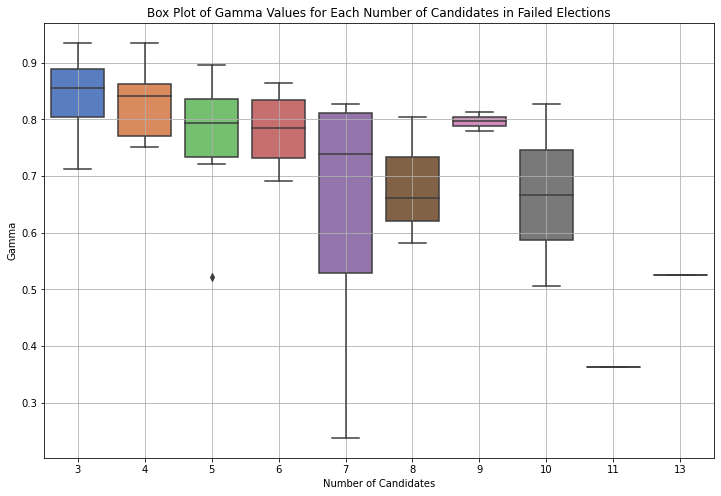

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
permissive_file_name = os.path.join("strict&permissive", "permissive.csv")

df = pd.read_csv(permissive_file_name)


# Step 2: Extract relevant information
df['diff'] = df['diff'].apply(eval)  # Convert string representation to list
df['IRV_present'] = df['diff'].apply(lambda x: 1 if 'IRV' in x else 0)

# Step 3: Filter the DataFrame to only include rows where IRV is present in the diff column
irv_present_df = df[df['IRV_present'] == 1]

# Step 4: Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='#candidates', y='gamma', data=irv_present_df, palette='muted')
plt.xlabel('Number of Candidates')
plt.ylabel('Gamma')
plt.title('Box Plot of Gamma Values for Each Number of Candidates in Failed Elections')
plt.grid(True)
plt.show()



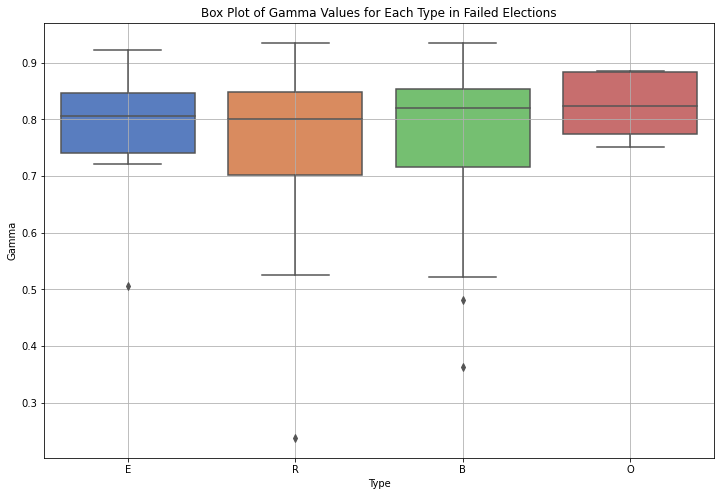

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
permissive_file_name = os.path.join("strict&permissive", "permissive.csv")

df = pd.read_csv(permissive_file_name)

# Step 2: Extract relevant information
df['diff'] = df['diff'].apply(eval)  # Convert string representation to list
df['IRV_present'] = df['diff'].apply(lambda x: 1 if 'IRV' in x else 0)

# Step 3: Filter the DataFrame to only include rows where IRV is present in the diff column
irv_present_df = df[df['IRV_present'] == 1]

# Step 4: Create the box plot for 'type'
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='gamma', data=irv_present_df, palette='muted')
plt.xlabel('Type')
plt.ylabel('Gamma')
plt.title('Box Plot of Gamma Values for Each Type in Failed Elections')
plt.grid(True)
plt.show()


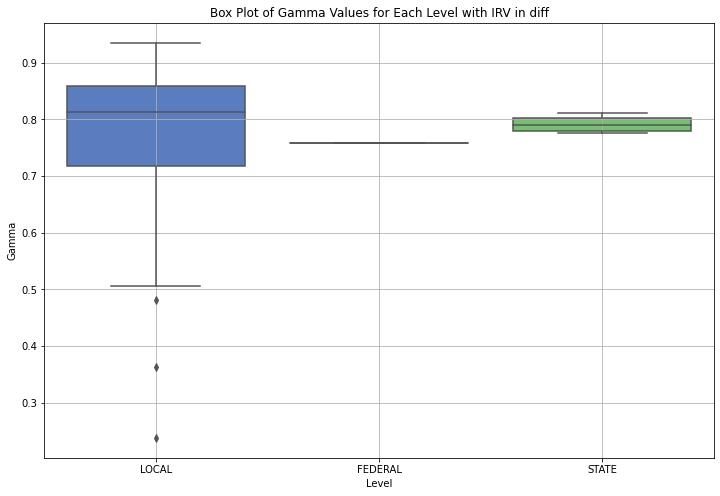

In [22]:
# Step 5: Create the box plot for 'level'
plt.figure(figsize=(12, 8))
sns.boxplot(x='level', y='gamma', data=irv_present_df, palette='muted')
plt.xlabel('Level')
plt.ylabel('Gamma')
plt.title('Box Plot of Gamma Values for Each Level with IRV in diff')
plt.grid(True)
plt.show()

<Figure size 720x432 with 0 Axes>

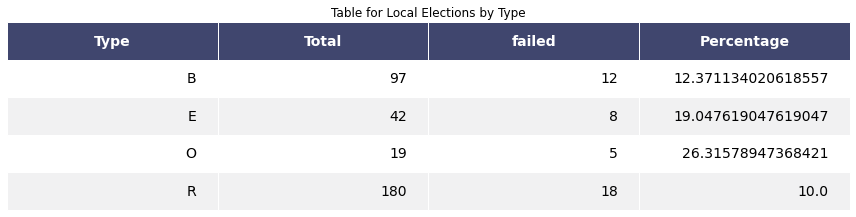

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv(permissive_file_name)

# Step 2: Extract relevant information
df['diff'] = df['diff'].apply(eval)  # Convert string representation to list
df['IRV_present'] = df['diff'].apply(lambda x: 1 if 'IRV' in x else 0)

# Step 3: Filter the DataFrame to only include rows where 'level' is 'local'
local_df = df[df['level'] == 'LOCAL']

# Step 4: Group by 'type' and count the occurrences of 'IRV' in the 'diff' column
irv_count_by_type = local_df.groupby('type')['IRV_present'].sum().reset_index(name='failed')

# Step 5: Count the total number of rows for each 'type' where 'level' is 'local'
total_by_type = local_df.groupby('type').size().reset_index(name='Total')

# Step 6: Merge the counts with the total counts
merged_data = pd.merge(total_by_type, irv_count_by_type, on='type')

# Step 7: Create a DataFrame for the table
table_data_local = pd.DataFrame({
    'Type': merged_data['type'],
    'Total': merged_data['Total'],
    'failed': merged_data['failed'],
    'Percentage': (merged_data['failed'] / merged_data['Total']) * 100
})

# Function to render a dataframe as an image with custom colors
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors)])
    return ax

# Render and save the table as an image with custom colors
plt.figure(figsize=(10, 6))
ax = render_mpl_table(table_data_local, header_columns=0, col_width=3.0,
                      header_color='#40466e', row_colors=['#f1f1f2', 'w'])
plt.title('Table for Local Elections by Type')
plt.tight_layout()
plt.savefig('table_local_elections_by_type.png', bbox_inches='tight', dpi=300)
plt.show()
